<a href="https://colab.research.google.com/github/Venchislav/Stats-for-DS/blob/main/GeneTherapy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [18]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')
print(data)

    expr Therapy
0    100       A
1     96       A
2    101       A
3     95       A
4    103       A
5     99       A
6     97       A
7     96       A
8     98       A
9    106       A
10   106       A
11   104       A
12    95       A
13    95       A
14   105       A
15   100       B
16   100       B
17    95       B
18    84       B
19   101       B
20   101       B
21    95       B
22   106       B
23   105       B
24    97       B
25   103       B
26    94       B
27    94       B
28   100       B
29   107       B
30    91       C
31    96       C
32    94       C
33    96       C
34    91       C
35    85       C
36    98       C
37    93       C
38   100       C
39    85       C
40   101       C
41   101       C
42    90       C
43    98       C
44    97       C
45    92       D
46    85       D
47    95       D
48    89       D
49    91       D
50    91       D
51    99       D
52    94       D
53    97       D
54    94       D
55    87       D
56    93       D
57    96      

<Axes: title={'center': 'expr'}, xlabel='Therapy'>

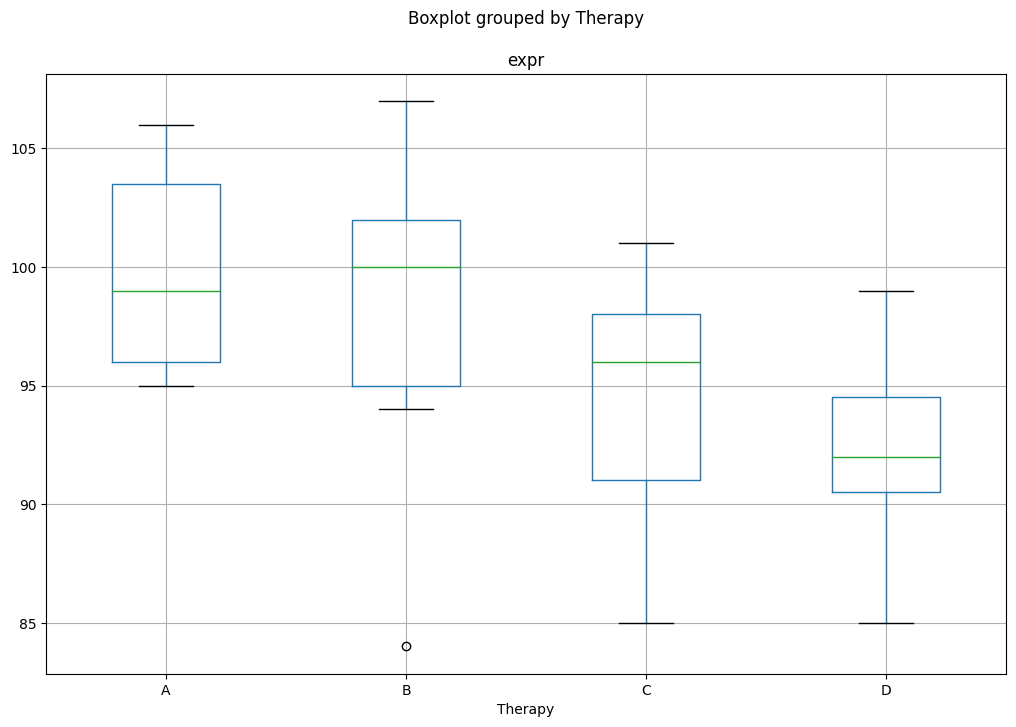

In [24]:
data.boxplot('expr', by='Therapy', figsize=(12, 8))

In [25]:
samples = [list(frame) for group, frame in data.groupby('Therapy')['expr']]
print(samples)
print(stats.f_oneway(*samples))

# As we can see here we got pvalue=0.00015249722895229536. It's less than 0.05 so we can discard H0
# P.S (H0 is hypothesis where we guess that means in all groups are equal and that these groups don't have difference)

[[100, 96, 101, 95, 103, 99, 97, 96, 98, 106, 106, 104, 95, 95, 105], [100, 100, 95, 84, 101, 101, 95, 106, 105, 97, 103, 94, 94, 100, 107], [91, 96, 94, 96, 91, 85, 98, 93, 100, 85, 101, 101, 90, 98, 97], [92, 85, 95, 89, 91, 91, 99, 94, 97, 94, 87, 93, 96, 92, 90]]
F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)


<ErrorbarContainer object of 3 artists>

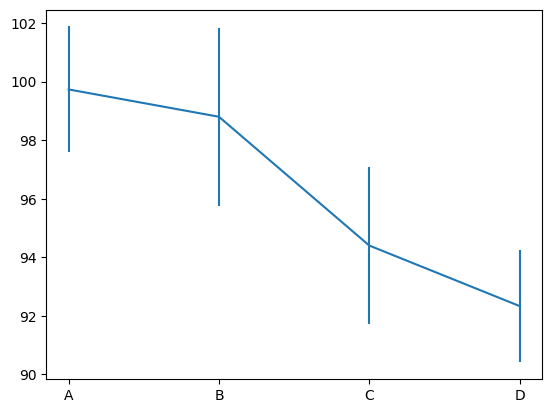

In [20]:
groups = data.groupby('Therapy')['expr']
n = groups.apply(len)
mean = groups.mean()
se = groups.std() / np.sqrt(n)

plt.errorbar(x = mean.index, y = mean, yerr = 2*se)